In [1]:
# If running in Google Colab, uncomment the following lines to install necessary packages
#!pip install warp-lang==1.7.0
#!pip install --upgrade git+https://github.com/psheehan/pinball-warp.git

In [1]:
from pinballrt.sources import Star
from pinballrt.grids import UniformCartesianGrid
from pinballrt.model import Model
from pinballrt.gas import Gas

import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

In [2]:
model = Model(grid=UniformCartesianGrid, grid_kwargs={"ncells":9, "dx":2.0*u.au})

density = np.ones(model.grid.shape)*1.0e-16 * u.g / u.cm**3
density[4,4,4] = 0.0 * u.g / u.cm**3  # Create a low-density cavity in the center

vx, vy, vz = np.meshgrid(0.5*(model.grid.grid.w1.numpy()[1:] + model.grid.grid.w1.numpy()[0:-1]), 
                       0.5*(model.grid.grid.w2.numpy()[1:] + model.grid.grid.w2.numpy()[0:-1]), 
                       0.5*(model.grid.grid.w3.numpy()[1:] + model.grid.grid.w3.numpy()[0:-1]), indexing='ij')
velocity = np.concatenate((vx[np.newaxis], vy[np.newaxis], vz[np.newaxis]), axis=0) * (-1.0 * u.km / u.s)

model.set_physical_properties(density=density, dust="yso.dst", amax=1.0*u.mm, p=3.5, gases=['co.dat'], 
                              abundances=[1.0e-4], microturbulence=0.2 * u.km / u.s, velocity=velocity)

Warp 1.7.0 initialized:
   CUDA Toolkit 12.8, Driver 0.0 (insufficient CUDA driver version!)
   Devices:
     "cpu"      : "x86_64"
   Kernel cache:
     /home/codespace/.cache/warp/1.7.0
Warp UserWarning: 
   Insufficient CUDA driver version.
   The minimum required CUDA driver version is 12.0, but the installed CUDA driver version is 0.0.
   Visit https://github.com/NVIDIA/warp/blob/main/README.md#installing for guidance.


Warp CUDA error: Could not open libcuda.so.
Warp CUDA error: Function cuDriverGetVersion_f: a suitable driver entry point was not found
Warp CUDA error 36 (in function cuda_driver_version, /builds/omniverse/warp/warp/native/warp.cu:1719)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc

In [3]:
star = Star()
star.set_blackbody_spectrum()
model.add_star(star)

In [4]:
model.thermal_mc(nphotons=1000000, device="cpu")

Iteration 0


Module pinballrt.sources 1808836 load on device 'cpu' took 46.73 ms  (cached)
Module pinballrt.grids 2b7aeed load on device 'cpu' took 2.09 ms  (cached)
Module pinballrt.utils 08b2efb load on device 'cpu' took 2.30 ms  (cached)


100%|██████████| 1000000/1000000 [00:08<00:00, 114560.25it/s]
/workspaces/pinball-warp/pinballrt/grids.py:424: RuntimeWarning: invalid value encountered in divide
  temperature = ((total_energy*u.L_sun).cgs.value / (4*const.sigma_sb.cgs.value*\


0
Iteration 1


100%|██████████| 1000000/1000000 [00:15<00:00, 66245.92it/s]


1
Iteration 2


100%|██████████| 1000000/1000000 [00:46<00:00, 21724.59it/s]


2 1.5727067 3.8231063
Iteration 3


100%|██████████| 1000000/1000000 [01:11<00:00, 14067.89it/s]


3 1.1690012 1.3453423
Iteration 4


100%|██████████| 1000000/1000000 [01:21<00:00, 12288.02it/s]


4 1.0569211 1.1060439
Iteration 5


100%|██████████| 1000000/1000000 [01:25<00:00, 11675.67it/s]

5 1.0174265 1.0388181


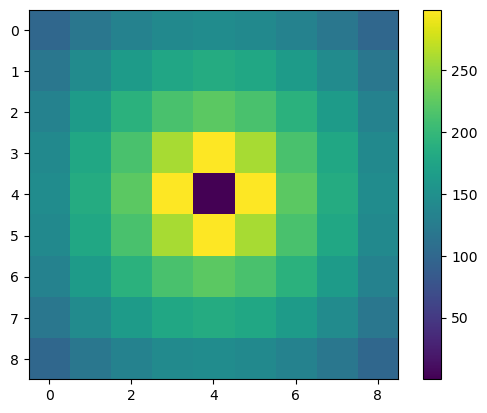

In [5]:
plt.imshow(model.grid_list["cpu"][0].grid.temperature.numpy()[:,:,4])
plt.colorbar()
plt.show()

In [8]:
image = model.make_image(npix=256, pixel_size=0.2*u.arcsec, channels=np.array([1., 1000.])*u.micron, incl=45.*u.degree, pa=45.*u.degree, distance=1.*u.pc, device='cpu')

Including gas 0 transition at 345.7959899 GHz
Including gas 0 transition at 461.0407682 GHz
Including gas 0 transition at 576.2679305 GHz
Including gas 0 transition at 691.4730763 GHz
Including gas 0 transition at 806.651806 GHz
Including gas 0 transition at 921.7997 GHz
Including gas 0 transition at 1036.912393 GHz
Including gas 0 transition at 1151.985452 GHz
Including gas 0 transition at 1267.014486 GHz
Including gas 0 transition at 1381.995105 GHz
Including gas 0 transition at 1496.922909 GHz
Including gas 0 transition at 1611.793518 GHz
Including gas 0 transition at 1726.6025057 GHz
Including gas 0 transition at 1841.345506 GHz
Including gas 0 transition at 1956.018139 GHz
Including gas 0 transition at 2070.615993 GHz
Including gas 0 transition at 2185.13468 GHz
Including gas 0 transition at 2299.569842 GHz
Including gas 0 transition at 2413.917113 GHz
Including gas 0 transition at 2528.17206 GHz
Including gas 0 transition at 2642.3303459 GHz
Including gas 0 transition at 2756.387

/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|██████████| 100000/100000 [00:07<00:00, 13226.93it/s]


Time: 8.141393184661865


100%|██████████| 100000/100000 [00:00<00:00, 533965.46it/s]


Time: 0.7967901229858398
65536
Module pinballrt.camera c7d3b15 load on device 'cpu' took 0.64 ms  (cached)


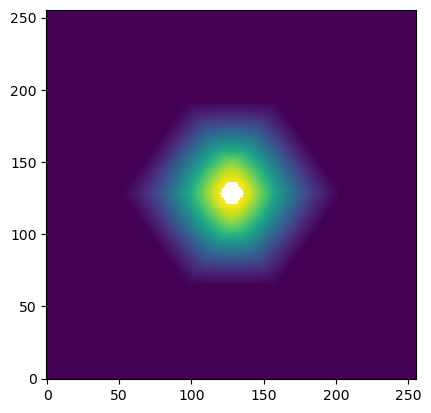

In [9]:
plt.imshow(image.intensity[:,:,1], origin="lower", interpolation="none")
plt.show()

In [11]:
g = Gas()
g.set_properties_from_lambda('co.dat')

image = model.make_image(npix=256, pixel_size=0.2*u.arcsec, channels=np.linspace(-5., 5., 10)*u.km/u.s, rest_frequency=g.nu[2], 
                         incl=45.*u.degree, pa=45.*u.degree, distance=1.*u.pc, device='cpu')

Including gas 0 transition at 345.7959899 GHz


100%|██████████| 100000/100000 [00:00<00:00, 439033.23it/s]


Time: 0.7963299751281738


100%|██████████| 100000/100000 [00:00<00:00, 520297.32it/s]


Time: 0.8237893581390381


100%|██████████| 100000/100000 [00:00<00:00, 503124.09it/s]


Time: 0.779876708984375


100%|██████████| 100000/100000 [00:00<00:00, 396922.14it/s]


Time: 0.8667309284210205


100%|██████████| 100000/100000 [00:00<00:00, 486441.06it/s]


Time: 0.7757582664489746


100%|██████████| 100000/100000 [00:00<00:00, 518145.39it/s]


Time: 0.7729036808013916


100%|██████████| 100000/100000 [00:00<00:00, 518420.77it/s]


Time: 0.7576239109039307


100%|██████████| 100000/100000 [00:00<00:00, 522214.81it/s]


Time: 0.9291698932647705


100%|██████████| 100000/100000 [00:00<00:00, 516309.72it/s]


Time: 0.7775521278381348


100%|██████████| 100000/100000 [00:00<00:00, 513233.59it/s]


Time: 0.7407441139221191
65536
